In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import gsw

In [15]:
rootdir = '/local/projects/so_decadal_variability/'
# Path to fluxes
fluxdir = 'flux/'
filename = 'SO_flux_*_era5_1979*'
fluxds = xr.open_mfdataset(rootdir+fluxdir+filename)
# Path to salinity
oceandir = 'ocean/'
filename = 'SO_ocean_sa_en4_era5_197901-201812.nc'
sads = xr.open_dataset(rootdir+oceandir+filename).isel(depth=0).squeeze().drop(['depth_bnds','time_bnds'])

In [16]:
# Get salinity data to the same time coordinate as the flux data
fluxds = fluxds.assign_coords(time=xr.cftime_range('1979-01-01', freq='1MS', periods=len(fluxds['time'])))
sads = sads.assign_coords(time=xr.cftime_range('1979-01-01', freq='1MS', periods=len(sads['time'])))

In [19]:
ds = xr.merge([fluxds,sads])

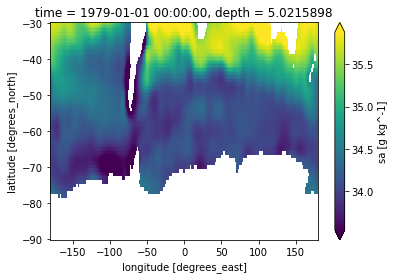

In [21]:
ds['sa'].isel(time=0).plot(robust=True)

In [18]:
sads

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 1440, time: 480)
Coordinates:
  * time       (time) object 1979-01-01 00:00:00 ... 2018-12-01 00:00:00
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -89.5 -89.75 -90.0
    depth      float32 5.022
Data variables:
    sa         (time, latitude, longitude) float32 ...
Attributes: (12/24)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.0
    institution:               UK Met Office
    title:                     Temperature and salinity analysis
    DSD_entry_id:              UKMO-L4UHFnd-GLOB-v01
    references:                None
    ...                        ...
    westernmost_longitude:     0.5
    easternmost_longitude:     362.5
    file_quality_index:        0
    history:                   Fri May 14 18:33:19 2021: cdo -P 4 remapcon2,/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...
    cdo_openmp_thread_number:  4